# Описание данных

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра».
Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500
пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за
2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов

- Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.
- Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок
округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется
в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

# **План работы** #

- изучить таблицы
- подготовить данные для анализа
- провести анализ
- проверить гипотезы
- сделать вывод

Нам необходимо проверить следующие гипотезы:
- средняя выручка от пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка от пользователей из Москвы отличается от выручки от пользователей из других регионов.

# **Изучение таблиц** #

In [13]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats as st

In [14]:
#откроем файлы с данными и изучим таблицы
df = pd.read_csv('/users.csv')
df_calls = pd.read_csv('/calls.csv')
df_internet = pd.read_csv('/internet.csv')
df_messages = pd.read_csv('/messages.csv')
df_tariffs = pd.read_csv('/tariffs.csv')

#выведем таблицы на экран и информацию о них
display(df.head())
df.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Здесь мы видим выборку из 500 пользователей с персональной информацией о каждом из них, а также данные об используемом тарифе.

Сразу можно отметить неправильный формат дат.

In [15]:
display(df_calls.head())
df_calls.info()
df_calls['duration'].describe()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Мы видим, что в данной таблице представлено количество звонков каждого пользователя, их продолжительность и дата осуществления. Странных значений мы не видим, однако подозрительно, что самый долгий звонок имеет продолжительсность 38 секунд.

Нам необходимо будет исправить: 
- формат даты;
- округлить время разговора до минут в большую сторону.

In [16]:
display(df_internet.head())
df_internet.info()
df_internet['mb_used'].describe()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

В данной таблице представлено, когда пользвоатель заходил в интернет и какой объем трафика исользовал. Странных значений не обнаружено.

Здесь следует исправить формат времени, общий интернет трафик будем определять по ходу анализа. 

In [17]:
display(df_messages.head())
df_messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Здесь мы видим, когда пользователь отправлял сообщения.

Также исправим формат даты.

In [18]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Как ни странно, теперь мы получили информцию о самих тарифах, и здесь все в порядке.

**Вывод**

Мы посмотрели информацию по всем таблицам и теперь готовы приступить к подготовке данных для анализа.

Нам необходимо:
- привести даты в таблицах к временному формату;
- округлить время до минут (как взимает плату оператор по условиям тарифов).

# **Подготовка данных** #

In [19]:
#приведем дату во всех таблицах к удобному формату
#заетм проверим результат

df['reg_date'] = pd.to_datetime(df['reg_date'], format='%Y-%m-%dT%')
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%dT%')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%dT%')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%dT%')

In [20]:
#округлим время звонков до минут
df_calls['duration'] = df_calls['duration'].apply(np.ceil).astype('int')

In [21]:
#добавим столбцы с месяцами операций для выполнеия подсчетов

df_calls['month'] = df_calls['call_date'].dt.month
df_messages['month'] = df_messages['message_date'].dt.month
df_internet['month'] = df_internet['session_date'].dt.month

In [22]:
#проверим результаты
df_calls.info()
df.info()
df_internet.info()
df_messages.info()
df_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int32         
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 7.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    ob

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


**Вывод**

Все данные исправлены и подготовлены к подсчетам. На данном этапе мы не будем склеивать все таблицы в одну. Это сможем сделать в дальнейшем при необходимости.

Мы не проводили провекру на пропуски значений и дубликаты, так как для оптимизации процесса сделаем это позже.

# **Перейдем к подсчетам.** #

Сначала нам необходимо посчитать для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам.

Затем мы найдем помесячную выручку с каждого пользователя.

In [23]:
#сгруппируем таблицу по уникальному идентификатору пользователя,
#посчитаем продолжительность разговоров в месяц и количество звонков

df_calls_statitics = df_calls.groupby(['user_id', 'month'])\
    .agg({'duration': 'sum', 'id': 'count'}).reset_index()\
    .rename(columns={'duration': 'month_calls_duration','id': 'total_count_calls_in_month'})

#проверим результаты
df_calls_statitics

,user_id,month,month_calls_duration,total_count_calls_in_month
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58
...,...,...,...,...
3169,1498,10,247,41
3170,1499,9,70,9
3171,1499,10,449,68
3172,1499,11,612,74


Проделаем аналогичную работу с другими таблицами.

In [24]:
df_messages_statistics = df_messages.groupby(['user_id', 'month'])\
    .agg({'id': 'count'}).reset_index()\
    .rename(columns={'id': 'total_count_messages_in_month'})
df_messages_statistics.head()

,user_id,month,total_count_messages_in_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [25]:
df_internet_statistics = df_internet.groupby(['user_id', 'month'])\
    .agg({'mb_used': 'sum'}).reset_index()\
    .rename(columns={'mb_used': 'month_mb_used'})

In [26]:
#также переведем столбец с использованным интернет-трафиком в гб

df_internet_statistics['month_gb_used'] = df_internet_statistics['month_mb_used'] / 1024
df_internet_statistics['month_gb_used'] = df_internet_statistics['month_gb_used'].apply(np.ceil).astype('int')
df_internet_statistics.head()

,user_id,month,month_mb_used,month_gb_used
0,1000,5,2253.49,3
1,1000,6,23233.77,23
2,1000,7,14003.64,14
3,1000,8,14055.93,14
4,1000,9,14568.91,15


In [27]:
#настало время объединить таблицы для выполнения необходимых подсчетов 

df_tariffs = df_tariffs.rename(columns={'tariff_name':'tariff'})

users_statistics = df.merge(df_calls_statitics, on=['user_id'], how='left')
users_statistics = users_statistics.merge(df_messages_statistics, on=['user_id', 'month'], how='outer')
users_statistics = users_statistics.merge(df_internet_statistics, on=['user_id', 'month'], how='outer')
users_statistics = users_statistics.merge(df_tariffs, on=['tariff'], how='outer')
users_statistics.head()
len(users_statistics['user_id'].unique())

500

In [28]:
#проверим пустые значения в таблице, может, кто-то не пользуется определенными опциями вообще

users_statistics.isna().sum()

user_id                             0
age                                40
churn_date                       3033
city                               40
first_name                         40
last_name                          40
reg_date                           40
tariff                             40
month                               8
month_calls_duration               48
total_count_calls_in_month         48
total_count_messages_in_month     505
month_mb_used                      19
month_gb_used                      19
messages_included                  40
mb_per_month_included              40
minutes_included                   40
rub_monthly_fee                    40
rub_per_gb                         40
rub_per_message                    40
rub_per_minute                     40
dtype: int64

In [29]:
#заполним пробелы нулями
users_statistics['month_calls_duration'] = users_statistics['month_calls_duration'].fillna(0)
users_statistics['total_count_calls_in_month'] = users_statistics['total_count_calls_in_month'].fillna(0)
users_statistics['month_mb_used'] = users_statistics['month_mb_used'].fillna(0)
users_statistics['month_gb_used'] = users_statistics['month_gb_used'].fillna(0)

In [30]:
users_statistics.isna().sum()

user_id                             0
age                                40
churn_date                       3033
city                               40
first_name                         40
last_name                          40
reg_date                           40
tariff                             40
month                               8
month_calls_duration                0
total_count_calls_in_month          0
total_count_messages_in_month     505
month_mb_used                       0
month_gb_used                       0
messages_included                  40
mb_per_month_included              40
minutes_included                   40
rub_monthly_fee                    40
rub_per_gb                         40
rub_per_message                    40
rub_per_minute                     40
dtype: int64

In [31]:
#также проверим на дубликаты

users_statistics.duplicated().sum()

0

In [32]:
#напишем функции по вычислению затрат клиентов

#затраты на превышение лимита минут

'''функция подсчета овердарфта минут'''

def overpay_mins(row):
    mins = (row['month_calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    
    if mins > 0:
        return mins
    else:
        return 0

    
'''функция подсчета овердарфта смс'''

#затраты на превышение лимита смс
def overpay_sms(row):
    sms = (row['total_count_messages_in_month'] - row['messages_included']) * row['rub_per_message']
    
    if sms > 0:
        return sms
    else:
        return 0

    
'''функция подсчета овердарфта интернет трафика'''

#затраты на превышение лимита интернет трафика
def overpay_gbs(row):
    gbs = (row['month_gb_used'] - row['mb_per_month_included'] / 1024) * row['rub_per_gb']
    
    if gbs > 0:
        return gbs
    else:
        return 0

In [33]:
#додбавим перепалты пользователей по каждому параметру тарифа,
#затем посчитаем суммарную переплату

users_statistics['overpay_mins'] = users_statistics.apply(lambda x: overpay_mins(x), axis=1)
users_statistics['overpay_sms'] = users_statistics.apply(lambda x: overpay_sms(x), axis=1)
users_statistics['overpay_gbs'] = users_statistics.apply(lambda x: overpay_gbs(x), axis=1)
users_statistics['total_revenue'] = users_statistics['overpay_mins'] + \
users_statistics['overpay_sms'] + users_statistics['overpay_gbs'] + \
users_statistics['rub_monthly_fee']
users_statistics.head()
len(users_statistics['user_id'].unique())

500

**Вывод**

Мы сгруппировали все необходимые данные, привели их в считабельный формат и вычислили, сколько каждый пользователь каждого тарифа приносит прибыли для оператора связи. Теперь у нас есть все необходимые цифры для проведения анализа.

# **Анализ данных** #

Опишишем, сколько минут разговора, сообщений и какой объём интернет-трафика требуется пользователям
каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение. Для наглядности построим гистограммы.

In [34]:
#проверим объемы выборок, чтобы понимать, с чем мы имеет дело

df['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Пользователей тарифа ultra в 2.35 раза меньше. Это логично, так как сам тариф стоит намного дороже и подключать его должно ментше пользователей.

In [35]:
#выведем информацию о требущихся нам параметрах тарифа гдекф и посчитаем
#дисперсию для более точного результата возьмем трафик в мегабайтах

users_statistics[users_statistics['tariff'] == 'ultra'][['month_calls_duration', 
                                                         'total_count_messages_in_month', 
                                                         'month_mb_used']].describe()

,month_calls_duration,total_count_messages_in_month,month_mb_used
count,957.000000,762.000000,957.000000
mean,542.031348,61.195538,19340.434556
std,308.978539,44.716597,10211.330843
min,0.000000,1.000000,0.000000
25%,308.000000,25.000000,11412.690000
50%,525.000000,52.000000,19300.030000
75%,756.000000,88.000000,26788.150000
max,1673.000000,224.000000,49745.690000


In [36]:
#так как у нас выборка, а не егнеральная совокупность, то будем считать оценку дисперсии

variance_ultra_calls = np.var(users_statistics[users_statistics['tariff'] == 'ultra']
                              ['month_calls_duration'], ddof=1)
variance_ultra_sms = np.var(users_statistics[users_statistics['tariff'] == 'ultra']
                            ['total_count_messages_in_month'], ddof=1)
variance_ultra_mbs = np.var(users_statistics[users_statistics['tariff'] == 'ultra']
                            ['month_mb_used'], ddof=1)
display(variance_ultra_calls, variance_ultra_sms, variance_ultra_mbs)

95467.73751000104

1999.5740667928983

104271277.58032946

Мы видим, в среднем пользователи тарифа ultra в день разговаривают 518 минут, пишут 51 смс и используют 19308 мб трафика.

Длительность звонков:

1. среднее = 526.62
2. стандартное отклонение = 307.6
3. дисперсия = 100873.63

Количество сообщений:

1. среднее = 61.16
2. стандартное отклонение = 45.93
3. дисперсия = 2109.66

Использованный трафик:

1. среднее = 19468.8
2. стандартное отклонение = 10087.17
3. дисперсия = 101751013.78

In [37]:
#повторим то же самое с тарифом smart

users_statistics[users_statistics['tariff'] == 'smart'][['month_calls_duration', 
                                                         'total_count_messages_in_month', 
                                                         'month_mb_used']].describe()

,month_calls_duration,total_count_messages_in_month,month_mb_used
count,2225.000000,1916.000000,2225.000000
mean,418.686292,38.747390,16194.796112
std,189.656900,26.817396,5893.675710
min,0.000000,1.000000,0.000000
25%,284.000000,17.000000,12625.710000
50%,422.000000,34.000000,16476.730000
75%,545.000000,55.000000,20046.380000
max,1435.000000,143.000000,38552.450000


In [38]:
variance_smart_calls = np.var(users_statistics[users_statistics['tariff'] == 'smart']
                              ['month_calls_duration'], ddof=1)
variance_smart_sms = np.var(users_statistics[users_statistics['tariff'] == 'smart']
                            ['total_count_messages_in_month'], ddof=1)
variance_smart_mbs = np.var(users_statistics[users_statistics['tariff'] == 'smart']
                            ['month_mb_used'], ddof=1)
display(variance_smart_calls, variance_smart_sms, variance_smart_mbs)

35969.73967262148

719.1727085911066

34735413.37260269

В то же время пользователи тарифа smart в день разговаривают в среднем 422 минуты, пишут 34 смс и используют 16506 мб трафика.

Длительность звонков:

1. среднее = 417.93
2. стандартное отклонение = 190.31
3. дисперсия = 36219.31

Количество сообщений:

1. среднее = 38.71
2. стандартное отклонение = 26.79
3. дисперсия = 717.59

Использованный трафик:

1. среднее = 16208.39
2. стандартное отклонение = 5870.48
3. дисперсия = 34462496.46

Text(0.5, 1.0, 'Распределение испозьзованных минут в месяц на тарифе smart')

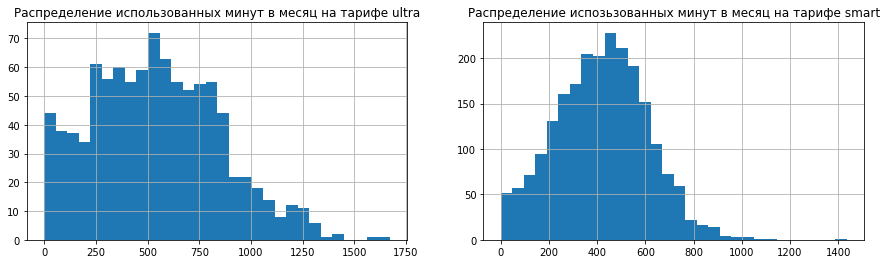

In [39]:
#построим гистограммы продолжительности звонков в месяц

fig, axes = plt.subplots(1,2,figsize=(15,4))

users_statistics[users_statistics['tariff'] == 'ultra']['month_calls_duration'].hist(bins=30, ax=axes[0])
users_statistics[users_statistics['tariff'] == 'smart']['month_calls_duration'].hist(bins=30, ax=axes[1])

axes[0].set_title('Распределение использованных минут в месяц на тарифе ultra')
axes[1].set_title('Распределение испозьзованных минут в месяц на тарифе smart')

По гистограмме видно - это также подверждается значениями медианы и среднего, - что график распределения минут на тарифе ultra скошен вправо, а на тарифе smart - влево. На графике тарифа ultra виден скачок в районе 0.

Text(0.5, 1.0, 'Количество написанных сообщений в месяц на тарифе smart')

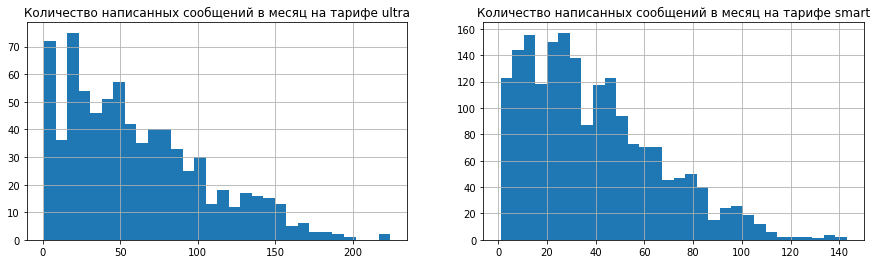

In [40]:
#построим гистограммы количества написанных сообщений в месяц

fig, axes = plt.subplots(1,2,figsize=(15,4))

users_statistics[users_statistics['tariff'] == 'ultra']['total_count_messages_in_month'].hist(bins=30, ax=axes[0])
users_statistics[users_statistics['tariff'] == 'smart']['total_count_messages_in_month'].hist(bins=30, ax=axes[1])
                                                        
axes[0].set_title('Количество написанных сообщений в месяц на тарифе ultra')
axes[1].set_title('Количество написанных сообщений в месяц на тарифе smart')

Обе гистограммы скошены вправо, что логично. В наше время пользователи редко пользуются смс.

Text(0.5, 1.0, 'Использованный интернет трафик в месяц на тарифе smart')

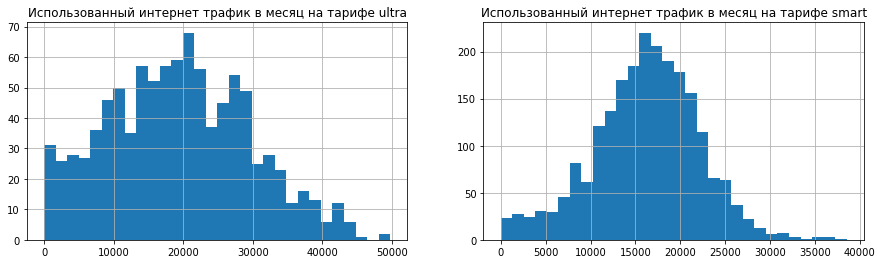

In [41]:
#построим гистограммы количества использованного интернет трафика в месяц

fig, axes = plt.subplots(1,2,figsize=(15,4))

users_statistics[users_statistics['tariff'] == 'ultra']['month_mb_used'].hist(bins=30, ax=axes[0])
users_statistics[users_statistics['tariff'] == 'smart']['month_mb_used'].hist(bins=30, ax=axes[1])
                                                        
axes[0].set_title('Использованный интернет трафик в месяц на тарифе ultra')
axes[1].set_title('Использованный интернет трафик в месяц на тарифе smart')

Здесть также видна разнонаправленная скошенность графиков: с тарифом ultra - вправо, с тарифом smart - влево. 

# **Проверка гипотез** #

Выдвенем нулевые и альтернативные гипотезы, исходя из поставленных задач:

- H0 - средняя выручка от пользователей тарифа "Ультра" равна выручке от пользователей тарифа "Смарт";
- H1 - средняя выручка от пользователей тарифа "Ультра" не равна выручке от пользователей тарифа "Смарт";


- H0 - средняя выручка от пользователей из Москвы равна выручке от пользователей из других городов;
- H1 - средняя выручка от пользователей из Москвы не равна выручке от пользователей из других городов.

Пороговое значение alpha задайте самостоятельно.
Поясните:
как вы формулировали нулевую и альтернативную гипотезы;
какой критерий использовали для проверки гипотез и почему.

In [42]:
#так как мы располагаем двумя сильно отличающимися по объему выборками,
#то воспользуемся функцией st.ttest_ind() с параметром equal_var=False


alpha_tariff = 0.05

result_tariff = st.ttest_ind(users_statistics[users_statistics['tariff'] == 'ultra']['total_revenue'], 
                            users_statistics[users_statistics['tariff'] == 'smart']['total_revenue'],
                            equal_var=False)

display('p-значение:', result_tariff.pvalue)

if result_tariff.pvalue < alpha_tariff:
    display('Отвергаем нулевую гипотезу.')
else:
    display('Не получилось отвергнуть нулевую гипотезу.')

'p-значение:'

2.796424815525196e-246

'Отвергаем нулевую гипотезу.'

Мы отвергаем гипотезу о том, что средняя выручка от пользователей тарифов "Ультра" и "Смарт" одинаковая.

In [43]:
#посчитаем количество месяцов, в которых использовали тарифы в Москве

users_statistics.query('city == "Москва"')['city'].count()

610

In [44]:
#теперь проверим вторую гипотезу

alpha_city = 0.05

result_city = st.ttest_ind(users_statistics[users_statistics['city'] == 'Москва']['total_revenue'], 
                            users_statistics[users_statistics['city'] != 'Москва']['total_revenue'],
                            equal_var=False)

display('p-значение:', result_city.pvalue)

if result_city.pvalue < alpha_city:
    display('Отвергаем нулевую гипотезу.')
else:
    display('Не получилось отвергнуть нулевую гипотезу.')

'p-значение:'

nan

'Не получилось отвергнуть нулевую гипотезу.'

В данном случае мы не можем отвергнуть гипотезу о том, что средняя выручка от пользователей из Москвы и других городов одинаковая.

# **Вывод** #

Мы сформировали нулевую и альтернативную гипотезы на основании общих гипотез, исходя из того, что в нулевой гипотезе всегда присутствует знак равенства.

Так как мы имеем сравнивали среднее двух генеральных совокупностей по взятым из них выборкам, то пользовались специальным методом scupy.ttest_ind(). Так как наши выборки сильно отличались по размеру, то мы указывали параметр equal_var как False.

С одной стороны, в результате проведенного исследования мы отвергли гипотезу о равной средней выручке от пользователей тарифов "Ультра" и "Смарт", поэтому нам необходимо проверить, какой же тариф в итоге выгоднец. С другой стороны, мы не смогли отвегрнуть гипотезу об одинаковой средней выручке от пользователей из Москвы и других городов.

# **Общий вывод** #

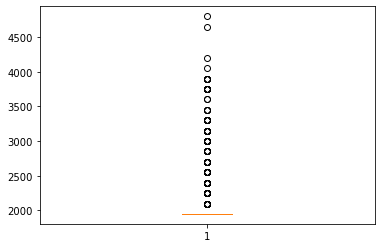

count     957.000000
mean     2070.219436
std       378.351486
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: total_revenue, dtype: float64

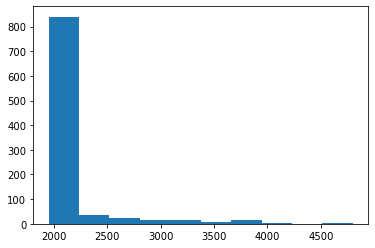

In [45]:
plt.boxplot(users_statistics[users_statistics['tariff'] == 'ultra']['total_revenue'])
plt.show()
plt.hist(users_statistics[users_statistics['tariff'] == 'ultra']['total_revenue'], bins=10)
users_statistics[users_statistics['tariff'] == 'ultra']['total_revenue'].describe()

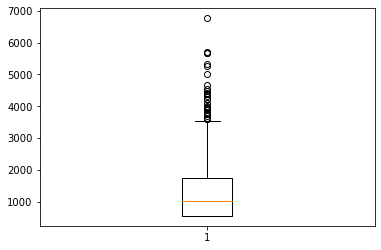

count    2225.000000
mean     1290.225169
std       819.052589
min       550.000000
25%       550.000000
50%      1023.000000
75%      1750.000000
max      6770.000000
Name: total_revenue, dtype: float64

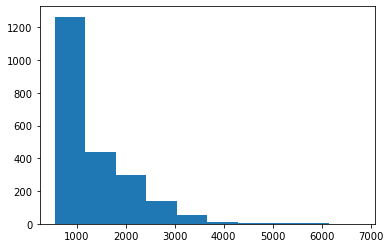

In [46]:
plt.boxplot(users_statistics[users_statistics['tariff'] == 'smart']['total_revenue'])
plt.show()
plt.hist(users_statistics[users_statistics['tariff'] == 'smart']['total_revenue'])
users_statistics[users_statistics['tariff'] == 'smart']['total_revenue'].describe()

# **Итог** #

Сначала мы изучили все данные, исправили их и подготовили к подсчетам.

Далее мы сгруппировали всю необходимую информацию, привели ее в считабельный формат и вычислили, сколько каждый пользователь каждого тарифа приносит прибыли для оператора связи.

Мы построили гистограммы, а также выдвинули нулевые и альтернативные гипотезы:

- H0 - средняя выручка от пользователей тарифа "Ультра" равна выручке от пользователей тарифа "Смарт";
- H1 - средняя выручка от пользователей тарифа "Ультра" не равна выручке от пользователей тарифа "Смарт";


- H0 - средняя выручка от пользователей из Москвы равна выручке от пользователей из других городов;
- H1 - средняя выручка от пользователей из Москвы не равна выручке от пользователей из других городов.

Проанализировав все данные мы пришли к следующим выводам:

- Во-первых, мы видим, что среднее значение переплаты у тарифа "Смарт" больше чем в 2 раза превышает размер абонентской платы. Такого не сказать о доходах с тарифа "Ультра".
- Во-вторых, несмотря на то что среднее значение доходов с тарифа "Смарт" меньше, на графике видна скошенность вправо, что свидетельствует о болших переплатах пользователей именно этого тарифного плана.

**Подводя итог, какой из тарифов лучше, можно однозначно сказать, что для компании "Мегалайн" выгоден тариф "Смарт"!**